In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [ ]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x = zp
y = ks
n = len(x)

Для нахождения коэффициентов регрессии $a$ и $b$ воспользуемся формулами:
$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$
$$a = \overline{y} - b \cdot {\overline{x}}.$$

In [ ]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

2.620538882402765

In [ ]:
a = np.mean(y) - b * np.mean(x)
a

444.1773573243596

Итак, уравнение регрессии имеет вид (коэффициенты округлены до сотых):
$$y = 444.18 + 2.62 \cdot x$$

In [ ]:
y_hat = a + b * x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

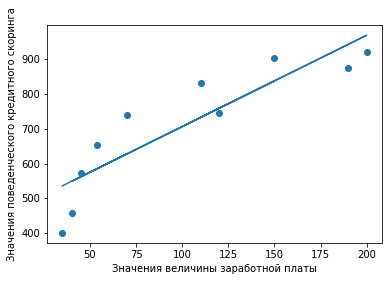

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_hat)
plt.xlabel('Значения величины заработной платы')
plt.ylabel('Значения поведенческого кредитного скоринга')
plt.show()

Матричный метод без intercept

In [ ]:
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)
B1 = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@Y)
B1

array([[5.88982042]])

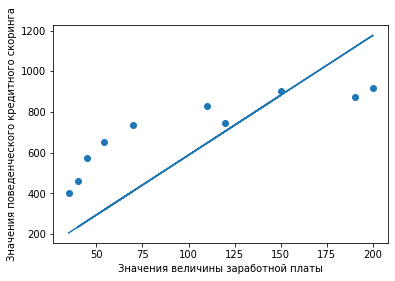

In [ ]:
plt.scatter(x, y)
plt.plot(x, x*B1[0])
plt.xlabel('Значения величины заработной платы')
plt.ylabel('Значения поведенческого кредитного скоринга')
plt.show()

Матричный метод с intercept

In [ ]:
X2 = np.hstack([np.ones((len(X), 1)), X])
X2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [ ]:
B2 = np.dot(np.linalg.inv(np.dot(X2.T, X2)), X2.T@Y)
B2

array([[444.17735732],
       [  2.62053888]])

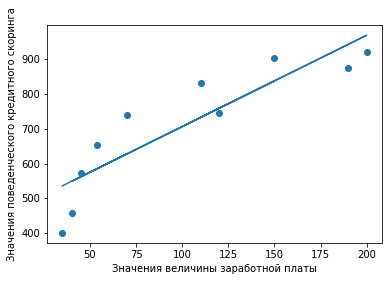

In [ ]:
plt.scatter(x, y)
plt.plot(x, B2[0] + x*B2[1])
plt.xlabel('Значения величины заработной платы')
plt.ylabel('Значения поведенческого кредитного скоринга')
plt.show()

##Задание 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [ ]:
def mse(B1, x = x, y = y, n = n):
    return np.sum((y - B1 * x)**2)/n

alpha = 1e-5
B1 = 0.1

for i in range(301):
    B1 -= alpha * (2/n)*np.sum((B1 * x - y)*x)
    if i%100 == 0:
        print(f'Iteration = {i}, B1 = {B1}, mse = {mse(B1)}')

Iteration = 0, B1 = 1.6952808000000004, mse = 298904.5992334053
Iteration = 100, B1 = 5.889820420132646, mse = 56516.85841571941
Iteration = 200, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration = 300, B1 = 5.889820420132688, mse = 56516.8584157194


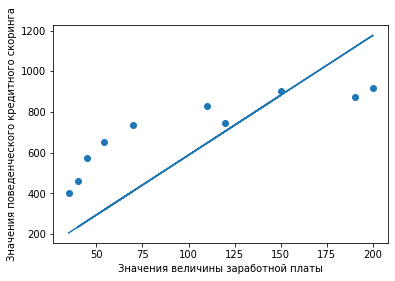

In [ ]:
plt.scatter(x, y)
plt.plot(x, x*B1)
plt.xlabel('Значения величины заработной платы')
plt.ylabel('Значения поведенческого кредитного скоринга')
plt.show()

##Задание 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [ ]:
def mse(B0, B1, x = x, y = y, n = n):
    return np.sum((y - (B0 + B1 * x))**2)/n

alpha = 2e-5
B1 = 0.1
B0 = 0.1

for i in range(1400001):
    B1_pred = B1
    B0_pred = B0
    B1 -= alpha * (2/n)*np.sum((B1_pred * x + B0_pred - y)*x)
    B0 -= alpha * (2/n)*np.sum(B1_pred * x + B0_pred - y)
    if i%200000 == 0:
        print(f'Iteration = {i}, B0 = {B0}, B1 = {B1}, mse = {mse(B0, B1)}')

Iteration = 0, B0 = 0.1279864, B1 = 3.2901560000000005, mse = 149526.33499003082
Iteration = 200000, B0 = 385.8148880087486, B1 = 3.0501124600955842, mse = 7334.441993584616
Iteration = 400000, B0 = 436.50630817310923, B1 = 2.67700119572162, mse = 6485.341111576515
Iteration = 600000, B0 = 443.1690895836179, B1 = 2.6279601787553992, mse = 6470.672077897803
Iteration = 800000, B0 = 444.04483257879133, B1 = 2.6215143231227036, mse = 6470.418656244823
Iteration = 1000000, B0 = 444.1599385302417, B1 = 2.6206670924287647, mse = 6470.414278142239
Iteration = 1200000, B0 = 444.17506783203214, B1 = 2.620555734078538, mse = 6470.414202506315
Iteration = 1400000, B0 = 444.1770563979531, B1 = 2.6205410973541645, mse = 6470.414201199627


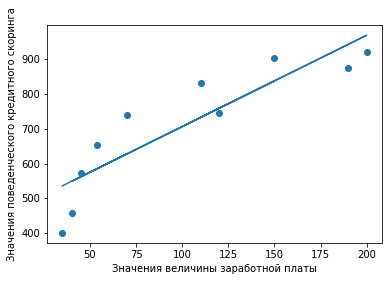

In [ ]:
plt.scatter(x, y)
plt.plot(x, B0 + x*B1)
plt.xlabel('Значения величины заработной платы')
plt.ylabel('Значения поведенческого кредитного скоринга')
plt.show()